In [1]:
# import required library
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# read data
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [5]:
# head of data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# tail of data
df.tail()

In [ ]:
# check missing value
df.isna().sum()

In [ ]:
len(df)

In [ ]:
# information of data
df.info()

In [ ]:
# description of data
df.describe().T

In [6]:
# declare features and target
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

In [ ]:
# lihat jumlah data
print(f'Count of X: {X.shape}\ncount of y: {y.shape}')

In [ ]:
c0 = df[df.DEATH_EVENT==0]
c1 = df[df.DEATH_EVENT==1]
print(f'count of data with label 0: {len(c0)}\ncount of data with label 1: {len(c1)}')

In [ ]:
# see proportion of labels
sns.countplot(x='DEATH_EVENT', data=df)

# 203 selamat
# 96 meninggal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3  # Ensure at least 3 columns per row
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
#nyari outlier per kolom.
kolom_numerik = df.select_dtypes(include=[int, float])
for kolom1 in kolom_numerik:
    for kolom2 in kolom_numerik:
        if kolom1 != kolom2:
            plt.figure()
            df.plot.scatter(x=kolom1, y=kolom2)
            plt.title(f"{kolom1} vs {kolom2}")
            plt.show()

In [ ]:
# plot comparison age by death event
sns.histplot(c0.age,kde=False,color="blue", label="Age for Death Event 0")
sns.histplot(c1.age,kde=False,color = "red", label = "Age for Death Event 1")
plt.title("Histograms for Age by Death Event")
plt.legend()

In [ ]:
# visualize to see distribution of the data
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [10]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=11)

In [11]:
print(f'panjang data train: {len(X_train)}')
print(f'panjang data test: {len(y_test)}')

panjang data train: 224
panjang data test: 75


In [45]:
X_test.iloc[23]

age                             62.0
anaemia                          0.0
creatinine_phosphokinase       231.0
diabetes                         0.0
ejection_fraction               25.0
high_blood_pressure              1.0
platelets                   253000.0
serum_creatinine                 0.9
serum_sodium                   140.0
sex                              1.0
smoking                          1.0
time                            10.0
Name: 11, dtype: float64

# **Test Decision Tree**

In [12]:
# declare model dtc
dtc = DecisionTreeClassifier(random_state=11, 
                             criterion='entropy')

In [13]:
# fitting the train data into model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=11)

In [14]:
# do a prediction using test data
npr_pred=dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, npr_pred)
acc_dtc

0.6933333333333334

In [15]:
# make a classification report
print(classification_report(y_test, npr_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        49
           1       0.56      0.58      0.57        26

    accuracy                           0.69        75
   macro avg       0.66      0.67      0.66        75
weighted avg       0.70      0.69      0.69        75



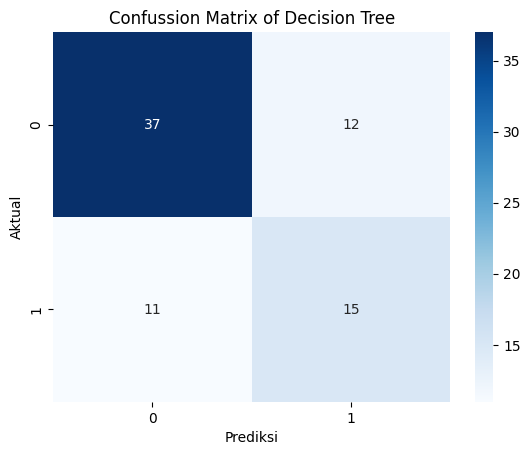

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, npr_pred)

ax = sns.heatmap(cm, annot=True, cmap="Blues")

ax.set_xlabel('Prediksi')
ax.set_ylabel('Aktual')
plt.title('Confussion Matrix of Decision Tree')
plt.show()

[Text(0.4296875, 0.9444444444444444, 'x[11] <= 73.5\nentropy = 0.896\nsamples = 224\nvalue = [154, 70]'),
 Text(0.15625, 0.8333333333333334, 'x[8] <= 136.5\nentropy = 0.706\nsamples = 52\nvalue = [10, 42]'),
 Text(0.0625, 0.7222222222222222, 'x[4] <= 47.5\nentropy = 0.345\nsamples = 31\nvalue = [2, 29]'),
 Text(0.03125, 0.6111111111111112, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.09375, 0.6111111111111112, 'x[7] <= 1.05\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.0625, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.125, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.25, 0.7222222222222222, 'x[8] <= 139.5\nentropy = 0.959\nsamples = 21\nvalue = [8, 13]'),
 Text(0.21875, 0.6111111111111112, 'x[0] <= 59.0\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(0.1875, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.5, 'x[7] <= 1.25\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(0.1875, 0.3888888888888889, 'x

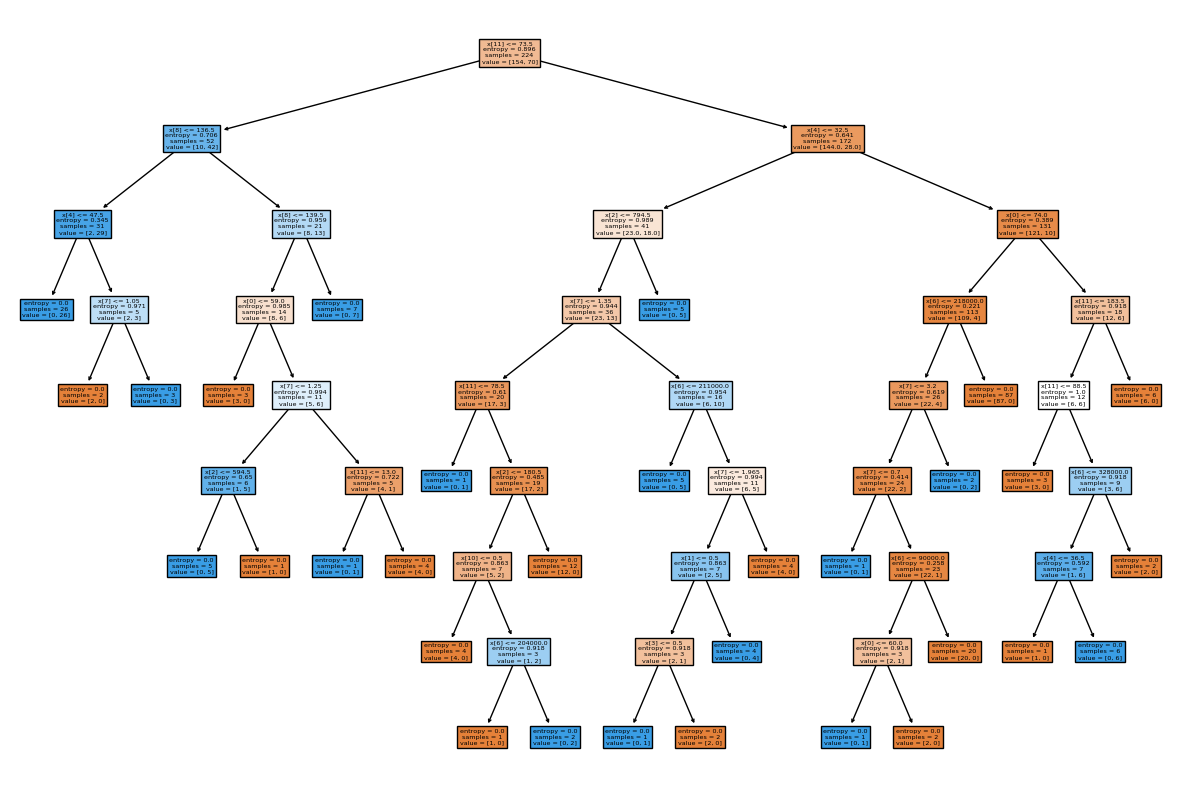

In [17]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)

# **Test Pruning Decision Tree**

In [18]:
clf = DecisionTreeClassifier(random_state=11, 
                             criterion='entropy')

In [19]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=11,
                             ccp_alpha=ccp_alpha, )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.23992817708272618


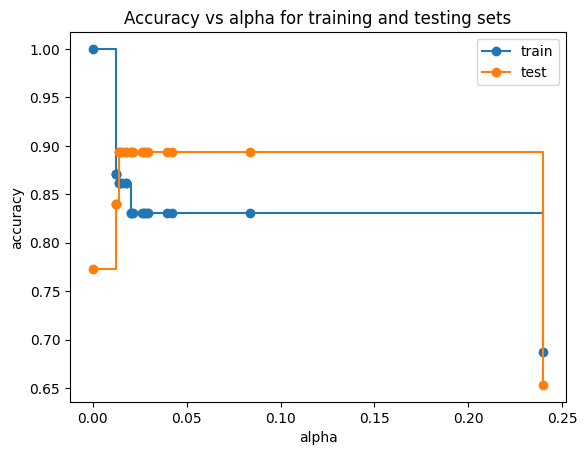

In [21]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [22]:
# in alpha -+0.3 accuracy model has incrased, use alpha 0.3 to pruning parameter (ccp_alpha)
# when more the alpha increases, the more the decision tree is cut
clf = DecisionTreeClassifier(random_state=11,
                             ccp_alpha=0.03, 
                             criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy', random_state=11)

In [27]:
import joblib

In [28]:
joblib.dump(clf, 'decision_tree_model.joblib')


['decision_tree_model.joblib']

In [29]:
clf_jb = joblib.load('decision_tree_model.joblib')


In [44]:
X_test.iloc[[23]]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
11,62.0,0,231,0,25,1,253000.0,0.9,140,1,1,10


In [43]:
# Assuming X_test is your test dataset and it's a pandas DataFrame
first_row_features = X_test.iloc[[23]]  # Extracting the first row of features
pred_out = clf_jb.predict(first_row_features)  # Making predictions on the first row
if pred_out == 0:
    print('The patient is predicted to survive.')
else:
    print('REST IN PACE!')


REST IN PACE!


In [31]:
acc_prdtc = accuracy_score(y_test, pred_out)
acc_prdtc

0.8933333333333333

In [23]:
# Pickle Model Output
import pickle

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [24]:
import h5py
import base64
import numpy as np

# Serialize and encode the model
serialized_model = pickle.dumps(clf)
encoded_model = base64.b64encode(serialized_model).decode('utf-8')

# Save the encoded model to an .h5 file
with h5py.File('decision_tree_model.h5', 'w') as f:
    f.create_dataset('model_params', data=np.string_(encoded_model))

In [25]:
# do a prediction and check accuracy score
pr_pred=clf.predict(X_test)
acc_prdtc = accuracy_score(y_test, pr_pred)
acc_prdtc

0.8933333333333333

In [26]:
# print classification report
print(classification_report(y_test, pr_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        49
           1       0.88      0.81      0.84        26

    accuracy                           0.89        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.89      0.89      0.89        75

